In [1]:
!pip install rdkit

In [1]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 13.8 MB/s eta 0:00:00a 0:00:01


In [7]:
%run MetaboliteModelFunctions-Copy1.ipynb

In [2]:
trainFile = 'training_data.csv'
testFile = 'test_data.csv'
#train_X, train_Y, test_X, test_Y = makeTrainAndTest(trainFile, testFile, 'pIC50', "RDKit")

In [3]:
tX = test_X
tY = test_Y

test_X = train_X
test_Y = train_Y

train_X = tX
train_Y = tY

In [5]:
importStatements()

In [3]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Descriptors
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingRegressor

In [ ]:
myPreds, predictionStats = loopedKfoldCrossVal('XGBR', 10, test_X, test_Y)

In [ ]:
createAvgBarChart(predictionStats)

In [ ]:
createSplitsBarChart(predictionStats)

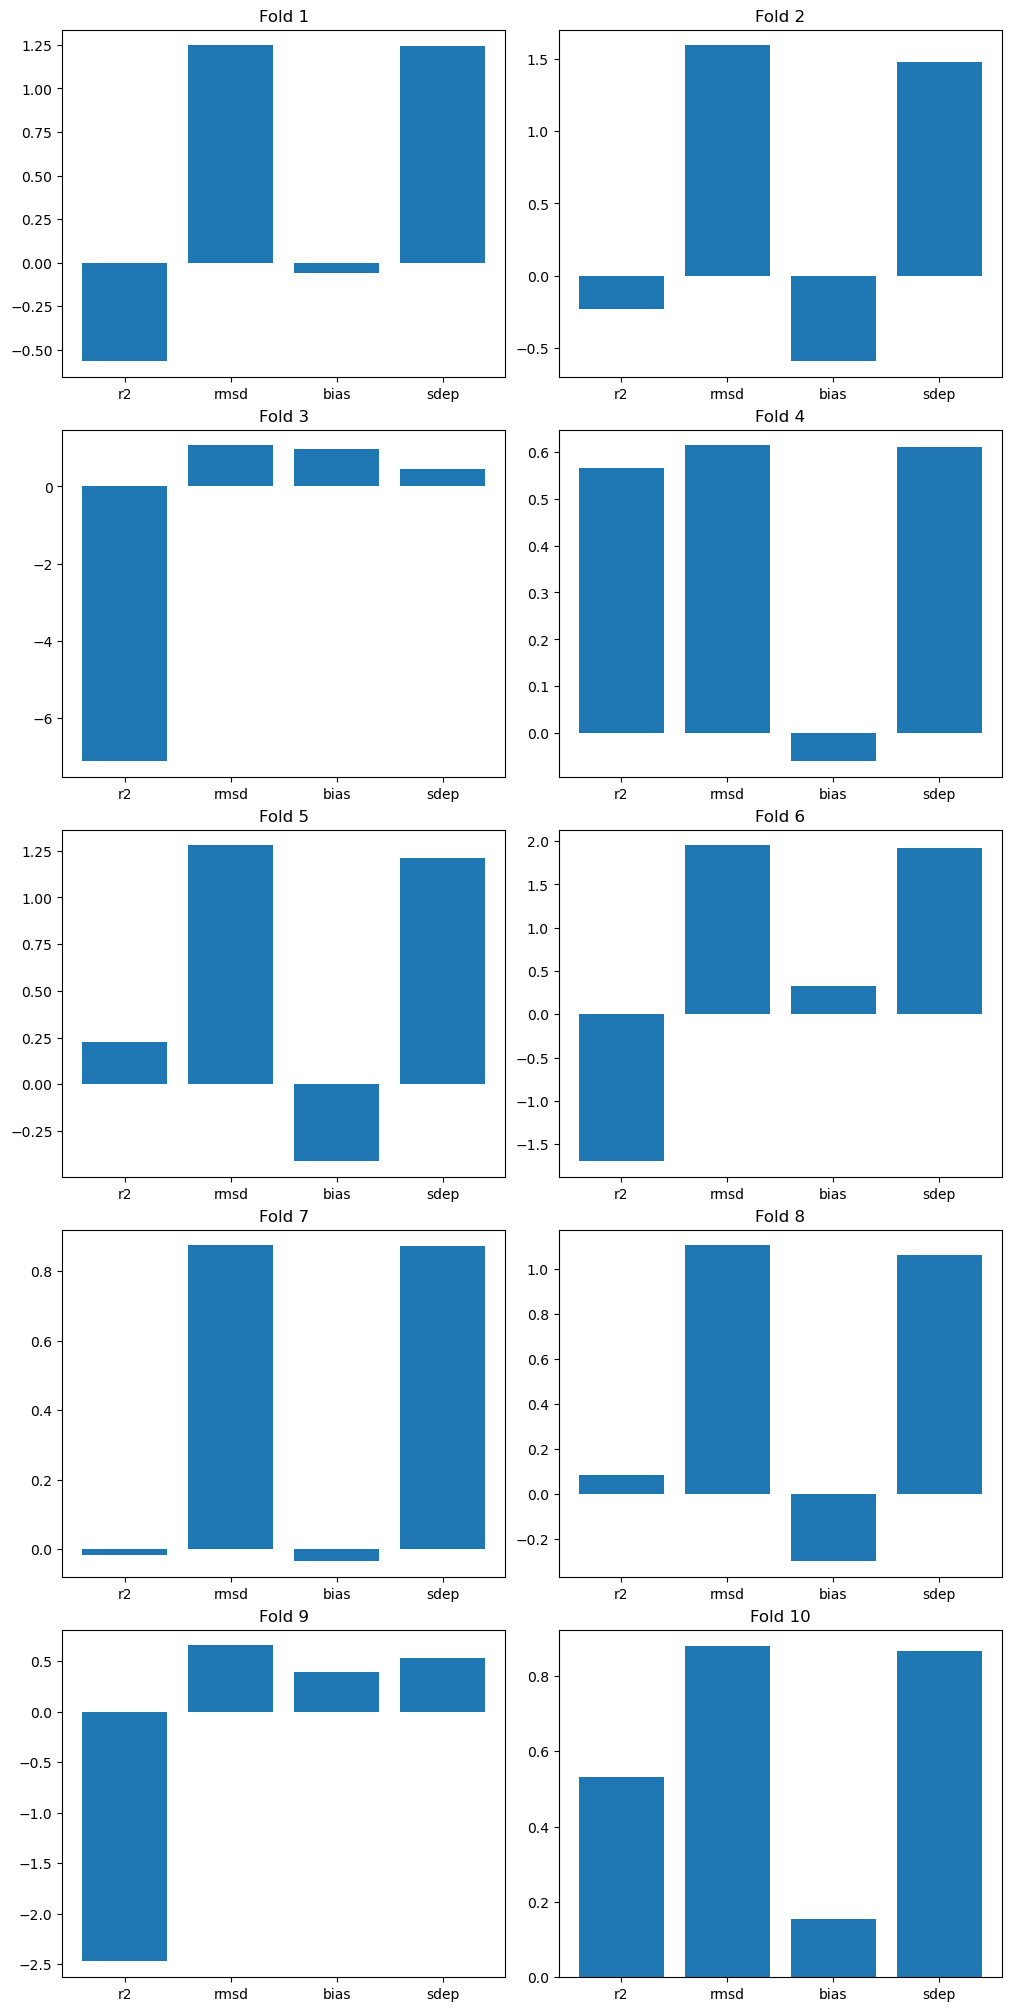

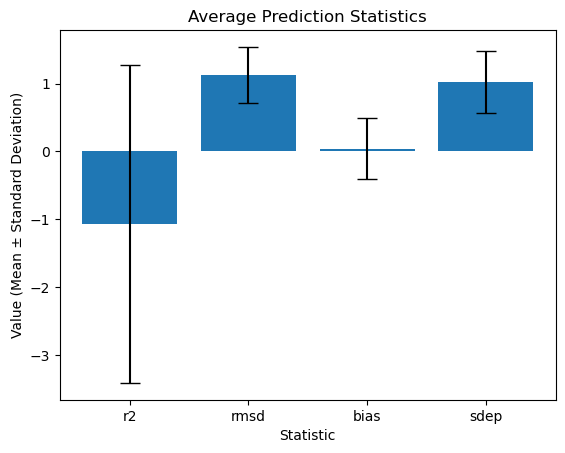

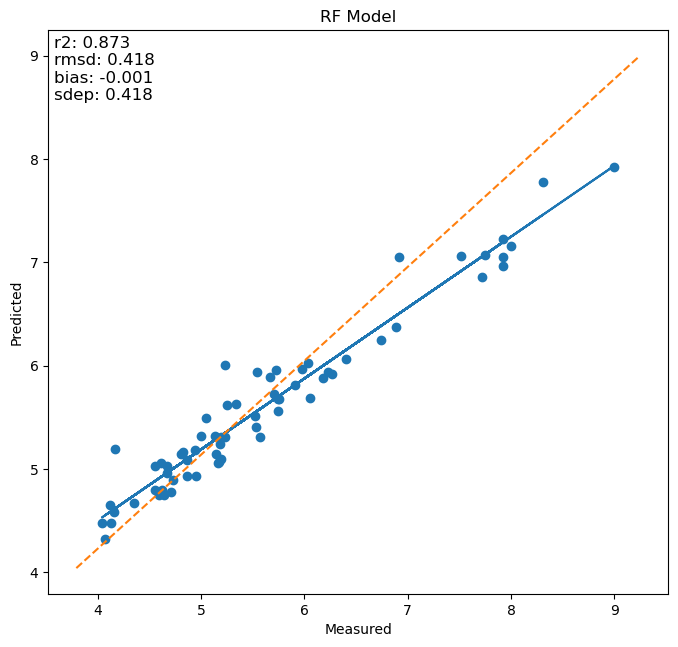

In [53]:
metaboliteModelStuff(testFile, testFile)

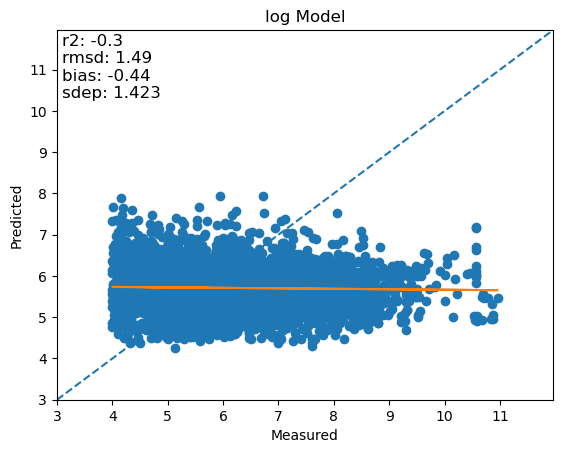

In [10]:
gradModelStuff(testFile, trainFile)

In [ ]:
makeModel(testFile, testFile, "Both", "XGBR", "Test Only")

/var/folders/dc/17vr7vvx0hs0zscdttw3xvdr0000gn/T/ipykernel_62868/133388980.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  avgResults = pd.concat([avgResults, avgVals])
/var/folders/dc/17vr7vvx0hs0zscdttw3xvdr0000gn/T/ipykernel_62868/362002727.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  All_Models = pd.concat([All_Models, df_ret])
/var/folders/dc/17vr7vvx0hs0zscdttw3xvdr0000gn/T/ipykernel_62868/133388980.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all

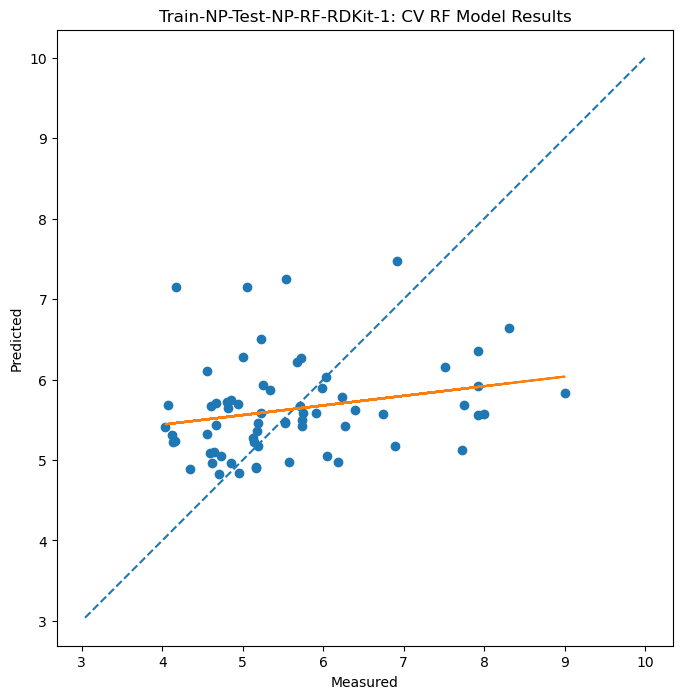

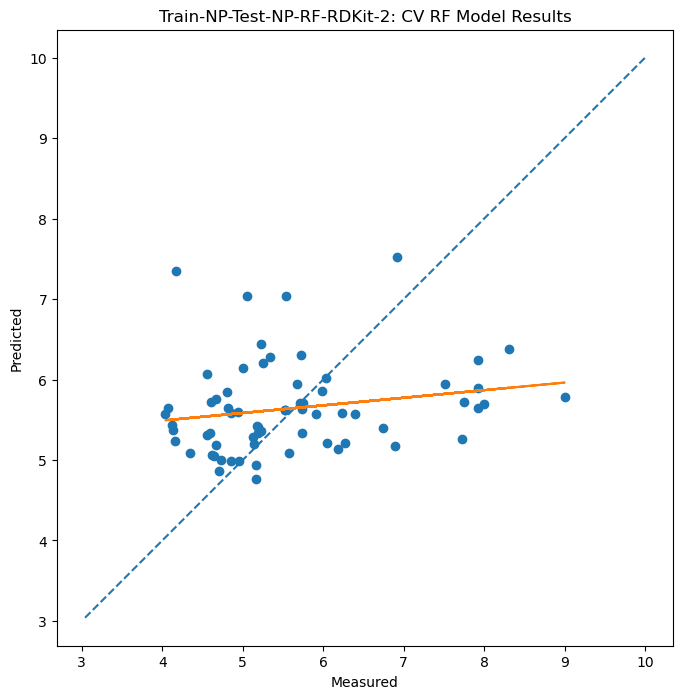

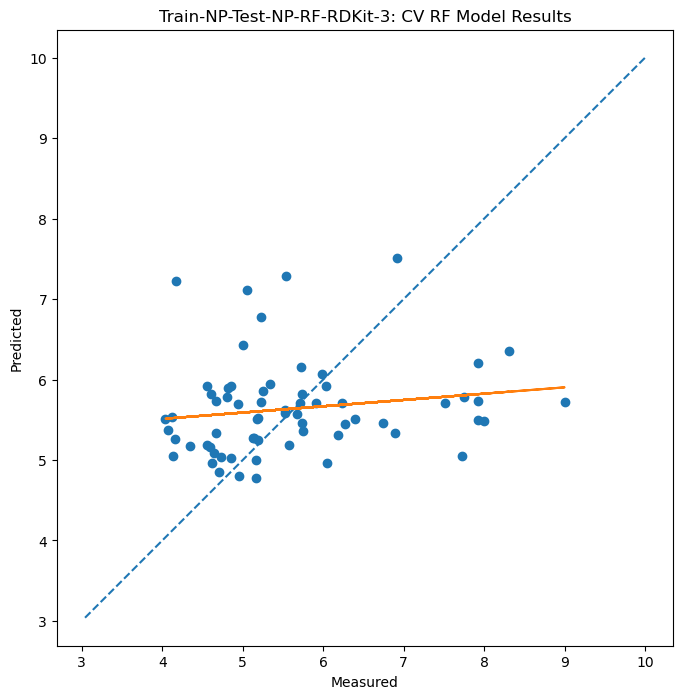

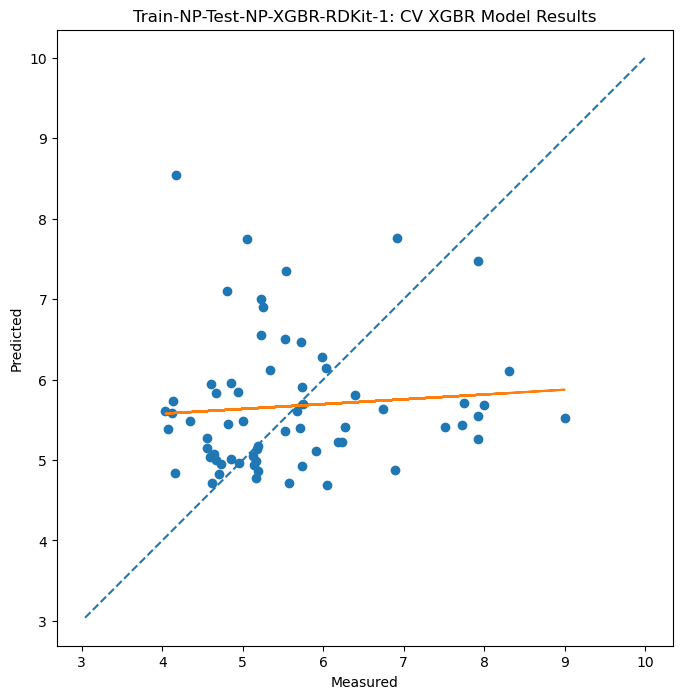

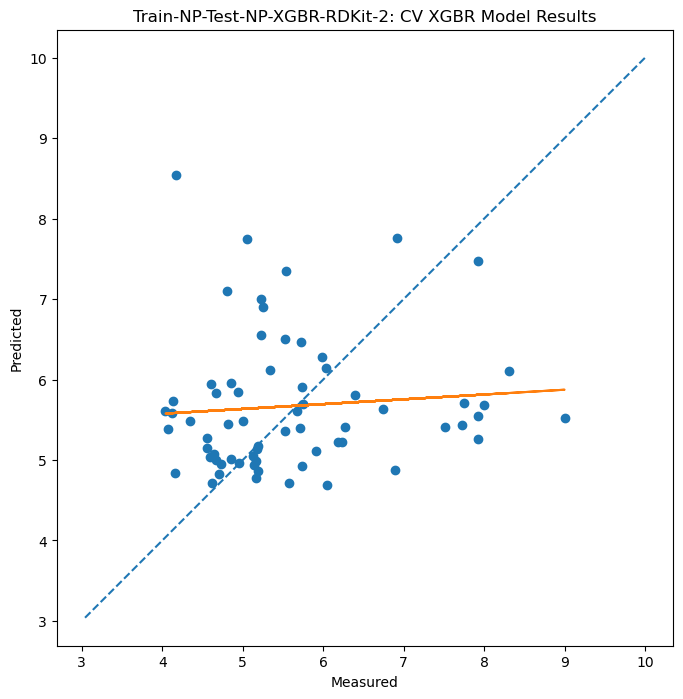

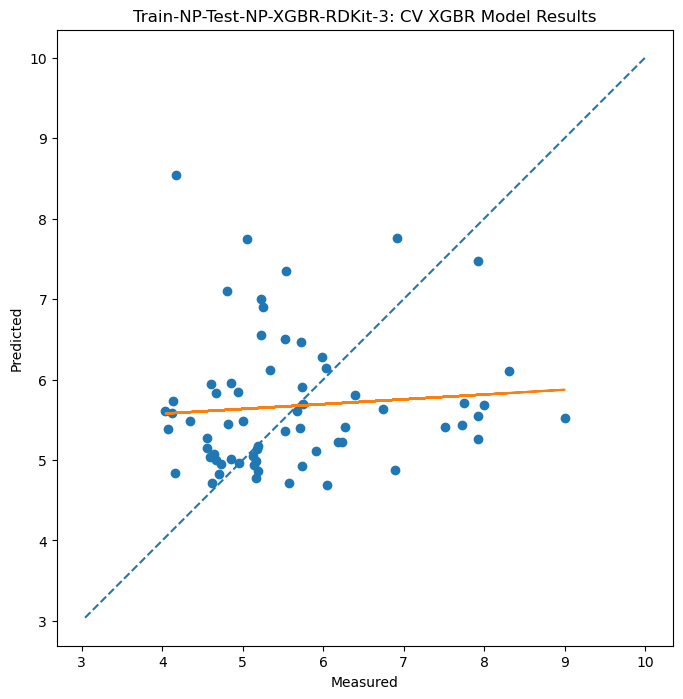

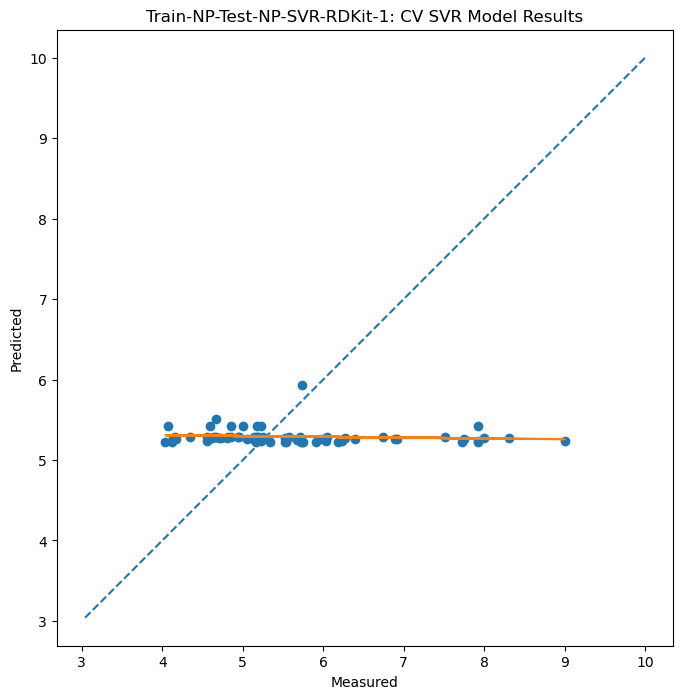

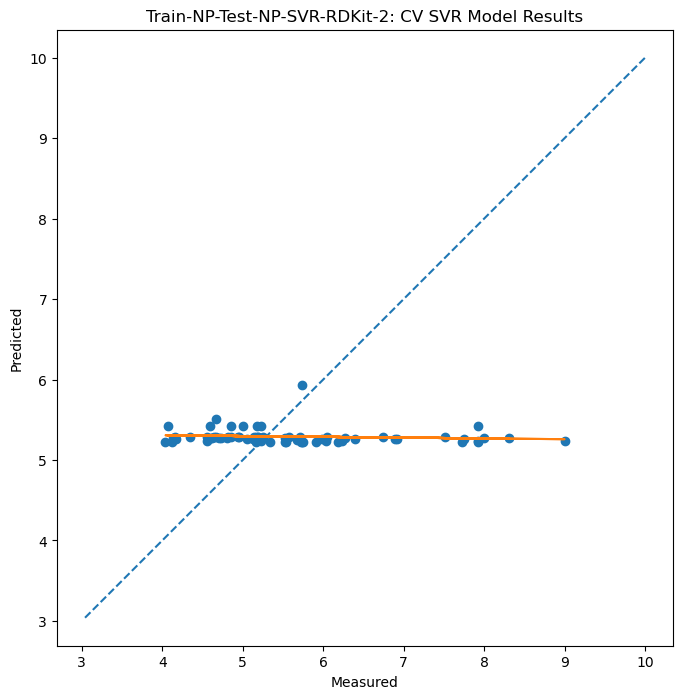

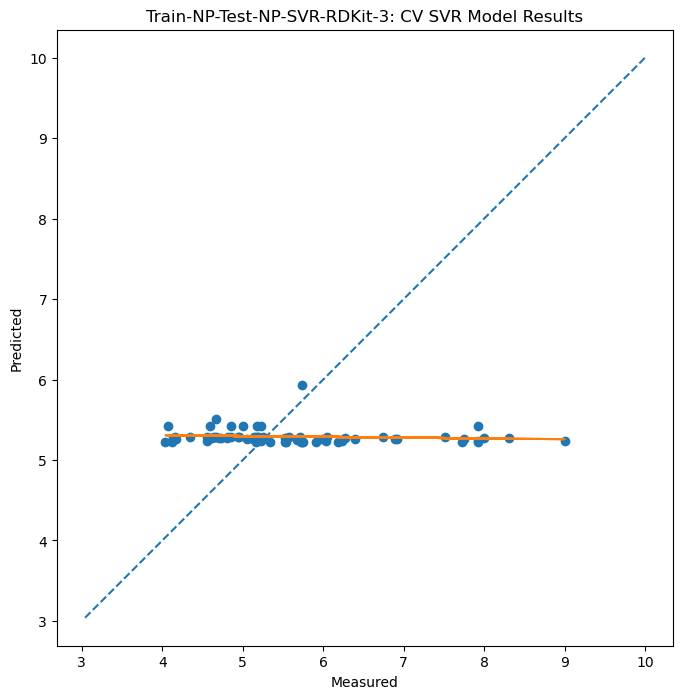

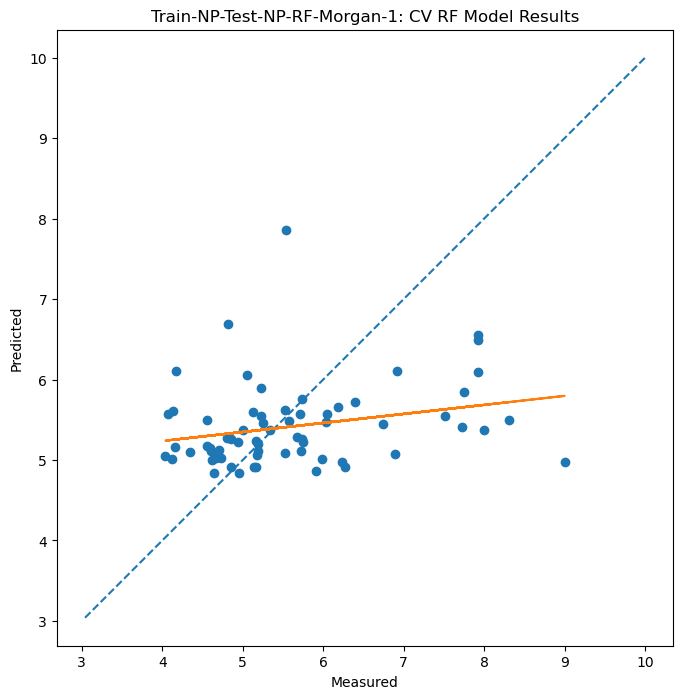

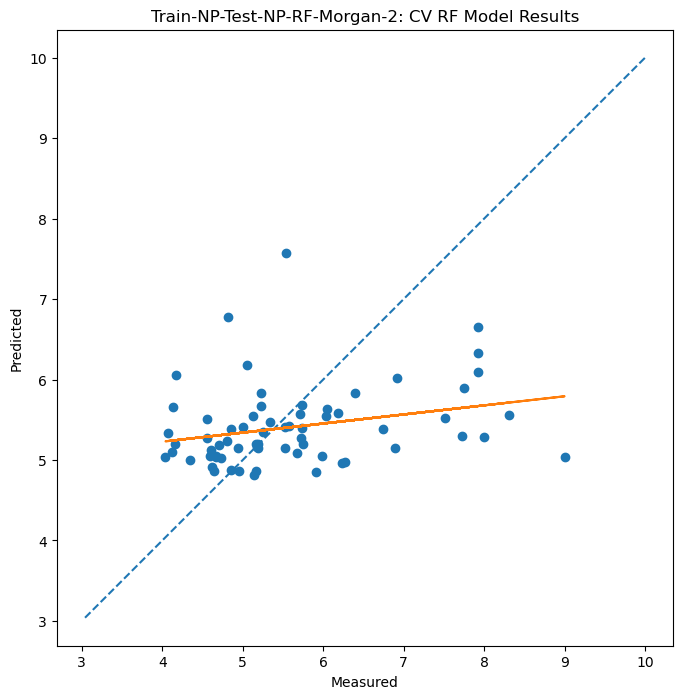

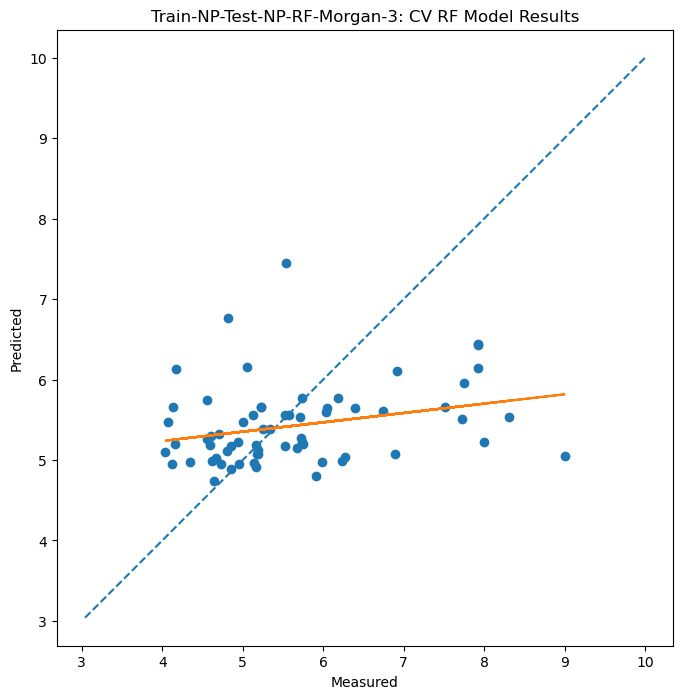

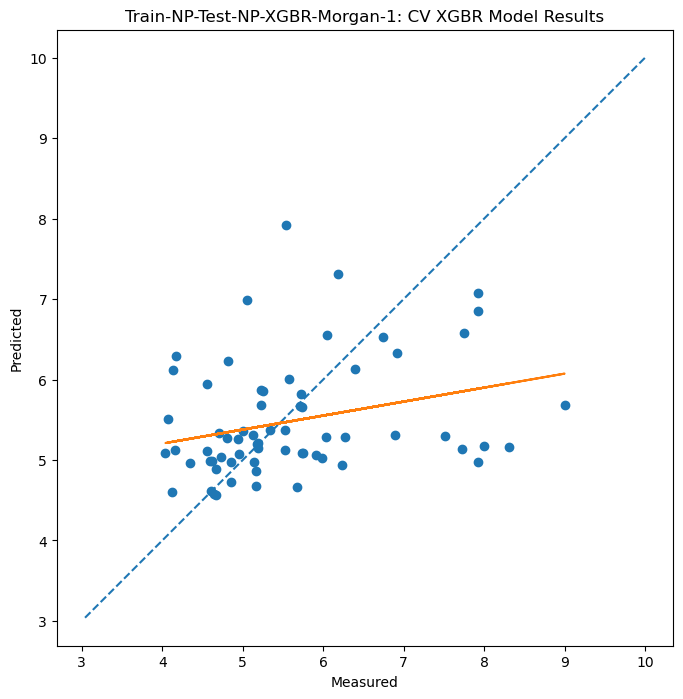

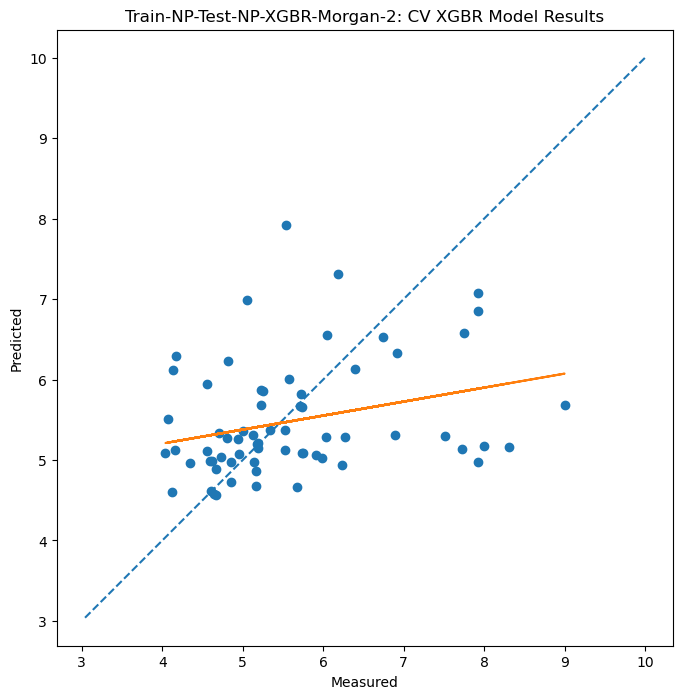

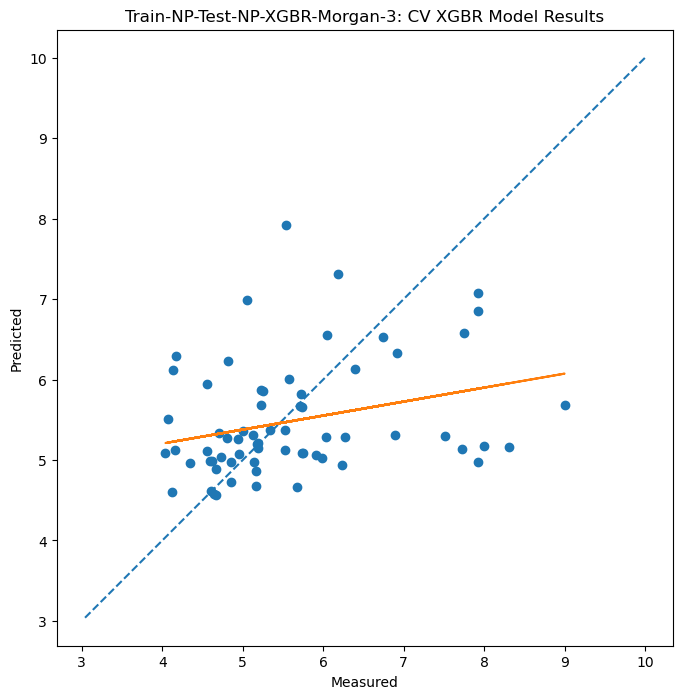

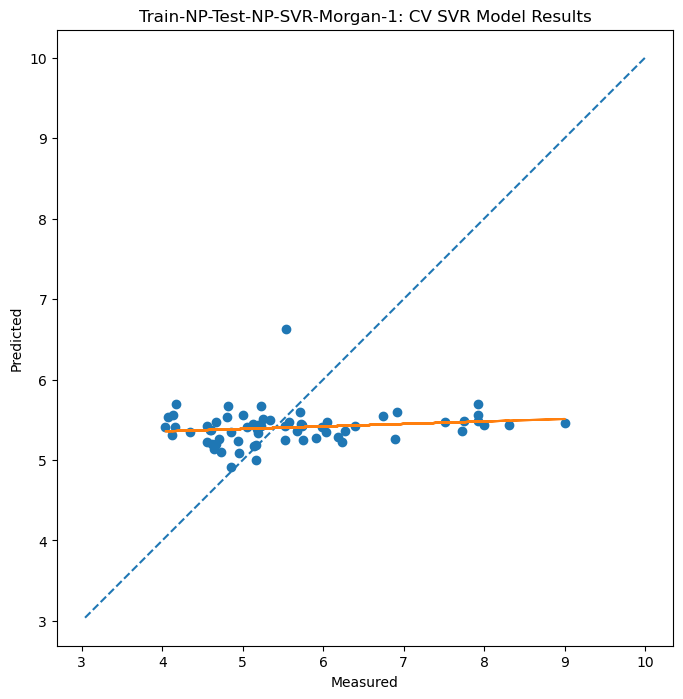

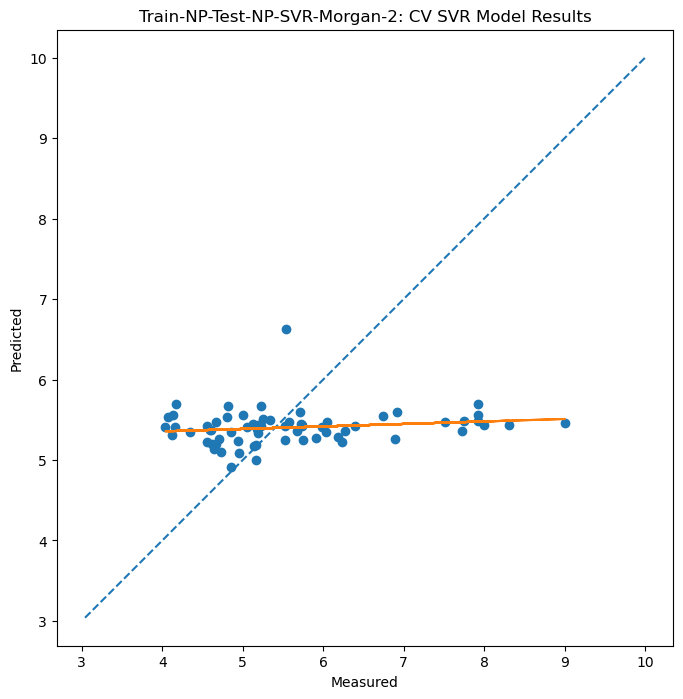

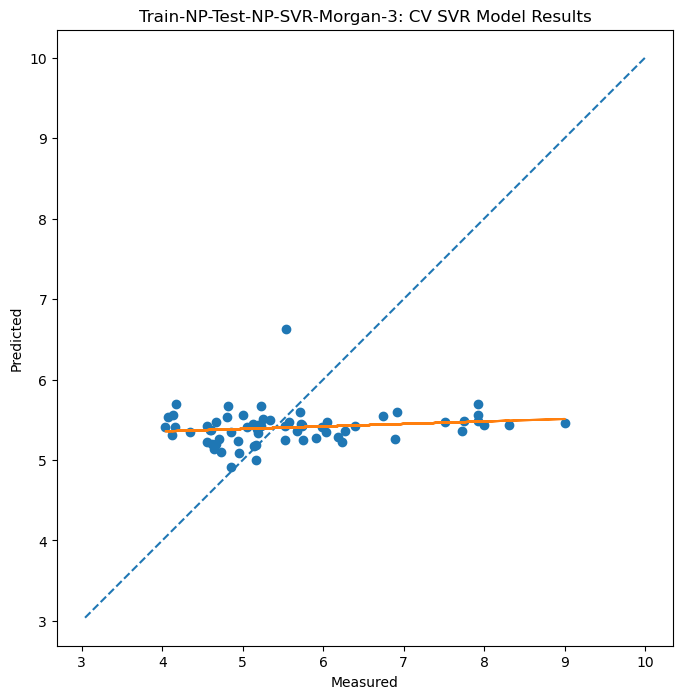

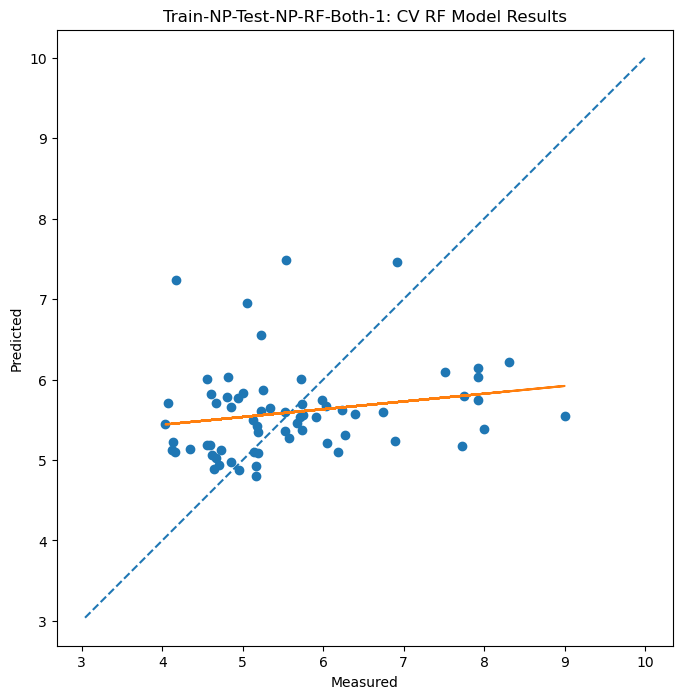

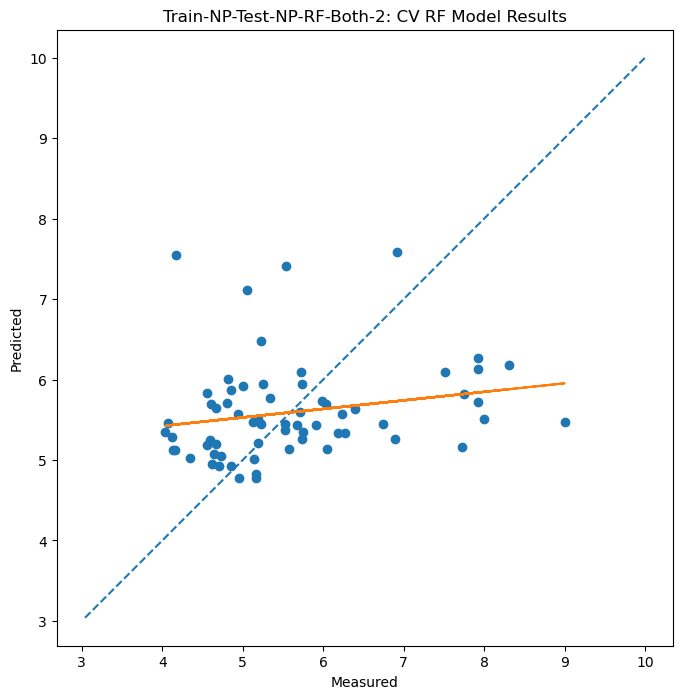

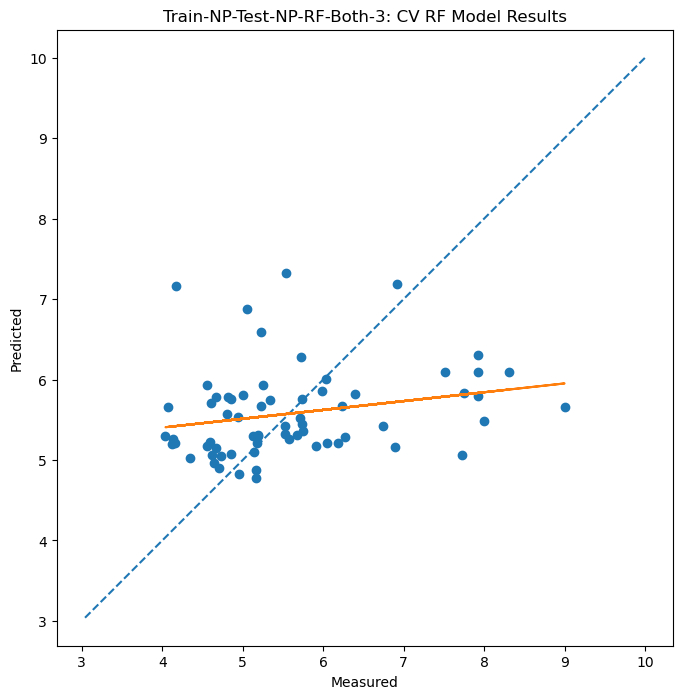

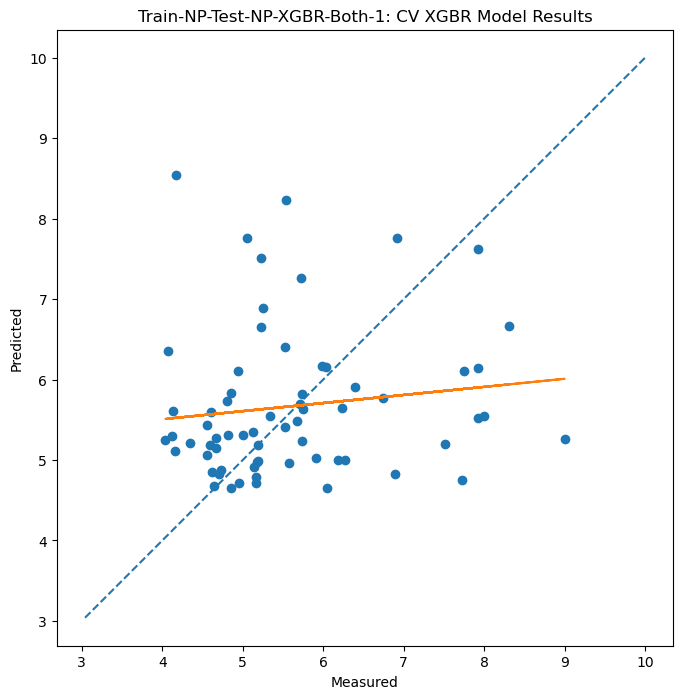

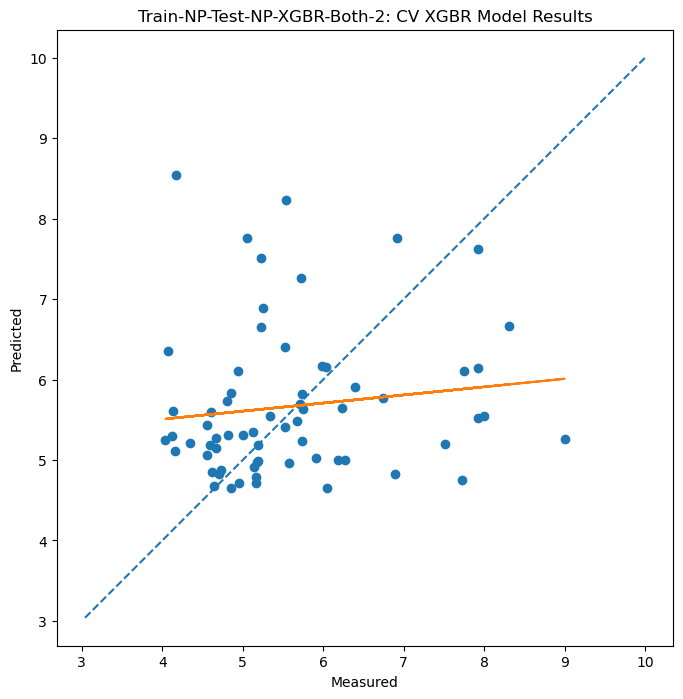

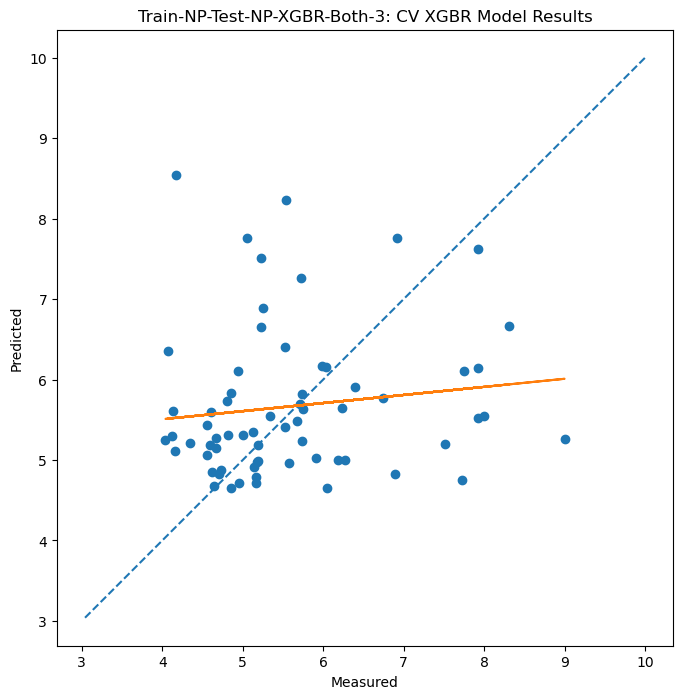

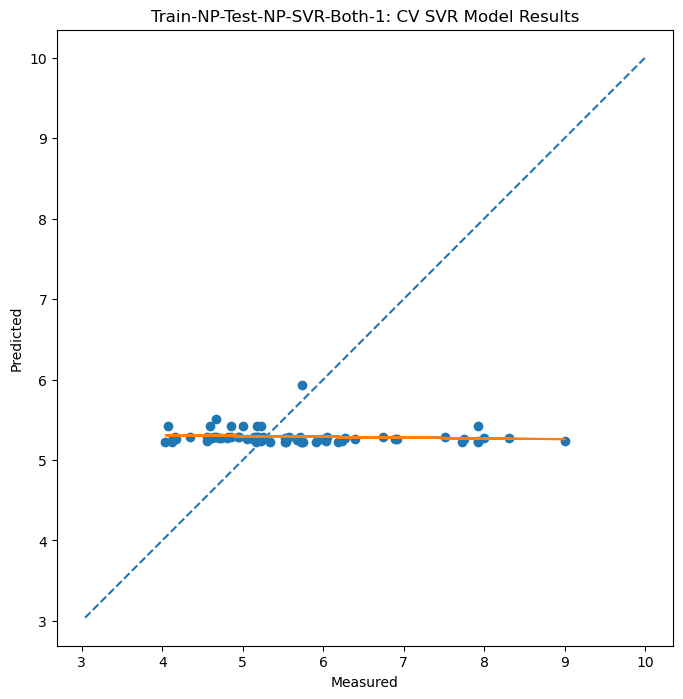

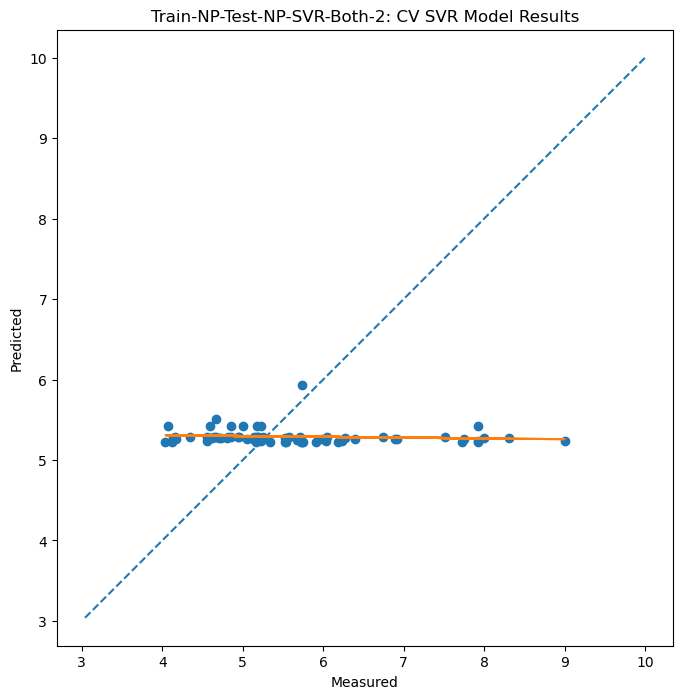

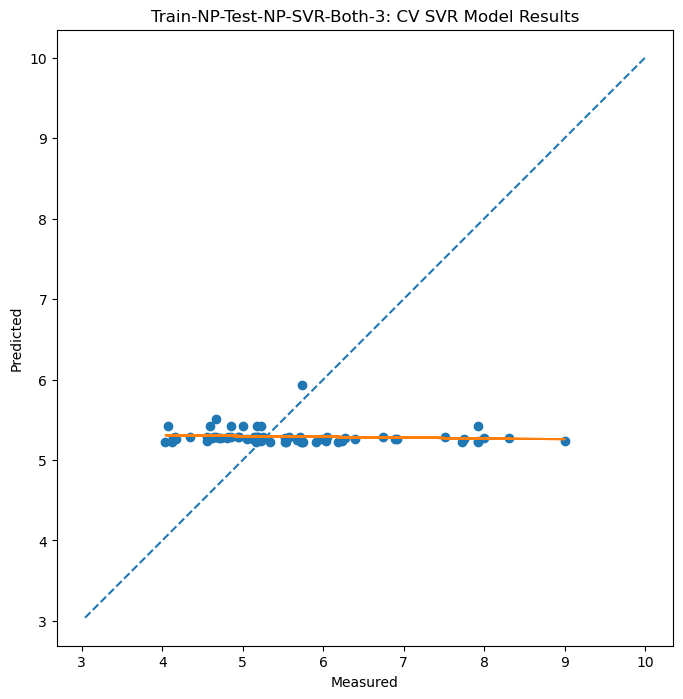

In [8]:
descriptors = ["RDKit", "Morgan", "Both"]
model = ["RF", "XGBR", "SVR"]
trainName = "NP"
testName = "NP"
All_Models = pd.DataFrame(data= [], columns=['Fold', 'Number of Molecules', 'r2', 'rmsd', 'bias', 'sdep', 'Model', 'Descriptor', 'Index', 'Train Set'])
for descr in descriptors:
   for mod in model:
        df_ret = makeModelCVAvg(testFile, testFile, descr, mod, f"Train-{trainName}-Test-{testName}")
        All_Models = pd.concat([All_Models, df_ret])


In [9]:
All_Models.to_csv("modelssss.csv", index = True)